In [1]:
from experimental.moons_t import moon_task
import optax
from experimental.breastcancer_t import breast_task

opts = [optax.sgd(0.005), optax.adam(0.0025), optax.noisy_sgd(0.005, 0.001, 0.75), optax.adamw(0.001)]
val_accs = []
test_accs = []

for key in [42,43,44, 45, 46]:
    temp = []
    test = []
    for idx, opt in enumerate(opts):
        task = moon_task(state=key)
        test_acc, vals = task.train(opt)
        temp.append(vals)
        test.append(test_acc)

    val_accs.append(temp)
    test_accs.append(test)

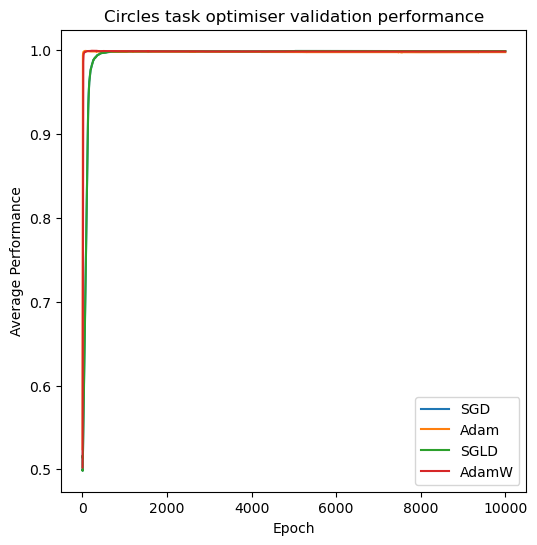

In [7]:
import matplotlib.pyplot as plt
import numpy as np

vals_np = np.array(val_accs)


# Compute the column-wise mean
column_means = vals_np.mean(axis=0)
std = vals_np.std(axis=0)

# Create plot
plt.figure(figsize=(6, 6))

# Assuming the x-axis represents the epochs
epochs = np.arange(1, 10001)  # or whatever the number of epochs/steps is

# Assuming the optimizers are as follows
optimizers = ['SGD', 'Adam', 'SGLD', 'AdamW']

for idx, optimizer in enumerate(optimizers):
    plt.plot(epochs, column_means[idx], label=optimizer)
    #plt.fill_between(epochs, column_means[idx] - std[idx], column_means[idx] + std[idx], alpha=0.2)

# for idx, optimizer in enumerate(optimizers):
#     plt.plot(epochs[1000:], column_means[idx][1000:], label=optimizer)
#     plt.fill_between(epochs[1000:], column_means[idx][1000:] - std[idx][1000:], column_means[idx][1000:] + std[idx][1000:], alpha=0.2)

plt.xlabel('Epoch')
plt.ylabel('Average Performance')
plt.title('Circles task optimiser validation performance')
plt.legend()

plt.show()

In [26]:
import jax
import jax.numpy as jnp
import optax

# Define the function
def f(v):
    return jnp.log(v**2 + 16 + 0.5)**2 + jnp.abs(jnp.sin(v - 4)) - 9
    return -(-jnp.sin(3 * v) - v ** 2 + 0.7 * v)
    return v**2 - 10*jnp.cos(2*jnp.pi*v) + 10

# Compute the gradient of the function
grad_f = jax.grad(f)

# Initialize v
# Create a random key
for i in range(20):
    key = jax.random.PRNGKey(i)
    print(jax.random.normal(key))

# Initialize v as a random value from a normal distribution
v = jax.random.normal(key)

# Create an Adam optimizer
optimizer = optax.adam(0.001)

# Initialize optimizer state
state = optimizer.init(v)

# Optimization loop for 1000 iterations
for i in range(1000):
    g = grad_f(v)
    updates, state = optimizer.update(g, state)
    v = optax.apply_updates(v, updates)
    if i % 100 == 0:
        print(f"Iteration {i}, v: {v}, f(v): {f(v)}")

-0.20584226
-1.1842843
-0.19161567
1.1048737
-0.98565876
0.3433717
0.040150158
1.0114812
1.3526084
0.40460026
-1.3445405
-0.11942908
-0.5135872
0.9101663
-0.76726353
0.06967723
0.1299977
-0.4442606
1.5367287
0.6581559
Iteration 0, v: 0.6591559052467346, f(v): -0.7968301773071289
Iteration 100, v: 0.7575592994689941, f(v): -0.8476276397705078
Iteration 200, v: 0.8508984446525574, f(v): -0.8910360336303711
Iteration 300, v: 0.8583950996398926, f(v): -0.8942985534667969
Iteration 400, v: 0.8582351207733154, f(v): -0.8942289352416992
Iteration 500, v: 0.8577456474304199, f(v): -0.8940181732177734
Iteration 600, v: 0.8578245639801025, f(v): -0.8940525054931641
Iteration 700, v: 0.8580169677734375, f(v): -0.8941364288330078
Iteration 800, v: 0.8584436178207397, f(v): -0.8942470550537109
Iteration 900, v: 0.8584548830986023, f(v): -0.894230842590332
